# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Historical Exchange Rate Visualization

The currency exchange rate is one of the most important determinants of a country's relative level of economic health. A higher-valued currency makes a country's imports less expensive and its exports more expensive in foreign markets, while a lower-valued currency makes a country's imports more expensive and its exports less expensive in foreign markets. Therefore, exchange rate movements can affect a nation's trading relationships with other nations.

This project will depict the historical exchange rate of Indonesia Rupiah currency (IDR) towards the US Dollar currency (USD) by visualizing through the plot graph. In detail, this project will present the historical exchange rate from 31 May - 26 November 2020. The historical exchange rates of IDR towards USD were collected from https://www.exchange-rates.org/history/IDR/USD/T and extracted by using web scrapping technique. This technique was processed using BeautifulSoup library and present it on a Flask Dashboard. In result, the plot then can be used to analyse the Indonesia's economics performance across the time. 


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [ ]:
!pip install beautifulsoup4
!pip install pandas
!pip install matplotlib
import pandas as pd
import matplotlib as plt

In [ ]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [ ]:
# Visualizing the result of HTML extracted from url  

url_get.content[1:777]  

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [38]:
# BeautifulSoup library to organize HTML collected so that it can be easier to read

from bs4 import BeautifulSoup 
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [17]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-26-2020">
     14,090.70769
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-26-2020">
     USD IDR rate for 11/26/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/25/2020
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/R


- th = table header
- tr = table row
- td = standard cell

In [18]:
tr = table.find_all('tr')
tr[:5]

[<tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>,
 <tr><td>11/25/2020</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/11-25-2020">14,136.09929</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-25-2020">USD IDR rate for 11/25/2020</a></td></tr>,
 <tr><td>11/24/2020</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/11-24-2020">14,137.48161</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-24-2020">USD IDR rate for 11/24/2020</a></td></tr>,
 <tr><td>11/23/2020</td><td>Monday</td><td><a href="/Rate/USD/IDR/11-23-2020">14,185.57119</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-23-2020">USD IDR rate for 11/23/2020</a></td></tr>,
 <tr><td>11/20/2020</td><td>Friday</td><td><a href="/Rate/USD/IDR/11-20-2020">14,162.60519</a> IDR</td><td class="text

Do the scrapping process here (please change this markdown with your explanation)

In [19]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):     # 1 is for starting the row 1
    row = table.find_all('tr')[i]   # define i as new object

    #get date
    date = row.find_all('td')[0].text
    date = date.strip() # removing whitespace
    
    # get currency
    currency = row.find_all('td')[2].text
    currency = currency.strip()
    
    temp.append((date, currency))
    
temp 

[('11/25/2020', '14,136.09929 IDR'),
 ('11/24/2020', '14,137.48161 IDR'),
 ('11/23/2020', '14,185.57119 IDR'),
 ('11/20/2020', '14,162.60519 IDR'),
 ('11/19/2020', '14,165.50144 IDR'),
 ('11/18/2020', '14,051.29503 IDR'),
 ('11/17/2020', '14,040.16051 IDR'),
 ('11/16/2020', '14,085.69501 IDR'),
 ('11/13/2020', '14,142.77143 IDR'),
 ('11/12/2020', '14,141.24303 IDR'),
 ('11/11/2020', '14,073.46024 IDR'),
 ('11/10/2020', '14,053.76135 IDR'),
 ('11/9/2020', '14,283.29667 IDR'),
 ('11/6/2020', '14,214.49744 IDR'),
 ('11/5/2020', '14,389.14027 IDR'),
 ('11/4/2020', '14,544.44634 IDR'),
 ('11/3/2020', '14,589.01774 IDR'),
 ('11/2/2020', '14,612.89990 IDR'),
 ('10/30/2020', '14,629.16216 IDR'),
 ('10/29/2020', '14,701.62361 IDR'),
 ('10/28/2020', '14,701.92586 IDR'),
 ('10/27/2020', '14,649.78960 IDR'),
 ('10/26/2020', '14,652.88010 IDR'),
 ('10/23/2020', '14,655.04157 IDR'),
 ('10/22/2020', '14,647.90877 IDR'),
 ('10/21/2020', '14,641.61060 IDR'),
 ('10/20/2020', '14,555.88071 IDR'),
 ('10/1

In [20]:
# chage the ordering of row upside-down

temp = temp[::-1]
temp

[('5/31/2020', '14,664.14584 IDR'),
 ('6/1/2020', '14,586.73900 IDR'),
 ('6/2/2020', '14,382.27395 IDR'),
 ('6/3/2020', '14,060.78946 IDR'),
 ('6/4/2020', '14,113.82802 IDR'),
 ('6/5/2020', '14,305.96407 IDR'),
 ('6/7/2020', '13,989.39489 IDR'),
 ('6/8/2020', '13,867.95377 IDR'),
 ('6/9/2020', '13,870.75718 IDR'),
 ('6/10/2020', '13,976.91611 IDR'),
 ('6/11/2020', '13,966.85142 IDR'),
 ('6/12/2020', '14,121.55442 IDR'),
 ('6/14/2020', '14,145.23543 IDR'),
 ('6/15/2020', '14,021.62200 IDR'),
 ('6/16/2020', '14,046.73959 IDR'),
 ('6/17/2020', '14,120.02241 IDR'),
 ('6/18/2020', '14,095.36729 IDR'),
 ('6/19/2020', '14,077.63950 IDR'),
 ('6/21/2020', '14,068.55627 IDR'),
 ('6/22/2020', '14,136.05128 IDR'),
 ('6/23/2020', '14,148.27391 IDR'),
 ('6/24/2020', '14,143.17320 IDR'),
 ('6/25/2020', '14,130.57047 IDR'),
 ('6/26/2020', '14,190.21303 IDR'),
 ('6/28/2020', '14,185.08225 IDR'),
 ('6/29/2020', '14,183.53912 IDR'),
 ('6/30/2020', '14,296.90560 IDR'),
 ('7/1/2020', '14,256.13040 IDR'),
 

## Creating data frame & Data wrangling

Put the array into dataframe

In [21]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'currency'))
df

,date,currency
0,5/31/2020,"14,664.14584 IDR"
1,6/1/2020,"14,586.73900 IDR"
2,6/2/2020,"14,382.27395 IDR"
3,6/3/2020,"14,060.78946 IDR"
4,6/4/2020,"14,113.82802 IDR"
...,...,...
140,11/19/2020,"14,165.50144 IDR"
141,11/20/2020,"14,162.60519 IDR"
142,11/23/2020,"14,185.57119 IDR"
143,11/24/2020,"14,137.48161 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [22]:
# Removing the 'IDR' on 'Currency' column, remove the sign ',', changing the 'Currency' column into 'float64', changing the 'Date' column into 'datetime64'

df['currency'] = df['currency'].str.replace(" IDR", "")
df['currency'] = df['currency'][:-2].str.replace(",", "")
df['currency'] = df['currency'].astype('float64').round(2)
df.date= pd.to_datetime(df.date, format = '%m/%d/%Y' )

In [23]:
# Checking whether any missing value

df.isna().sum()

date        0
currency    2
dtype: int64

In [24]:
# Filling NaN value for the last two row

df.fillna(method='ffill')

,date,currency
0,2020-05-31,14664.15
1,2020-06-01,14586.74
2,2020-06-02,14382.27
3,2020-06-03,14060.79
4,2020-06-04,14113.83
...,...,...
140,2020-11-19,14165.50
141,2020-11-20,14162.61
142,2020-11-23,14185.57
143,2020-11-24,14185.57


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      145 non-null    datetime64[ns]
 1   currency  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB
None


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with the Analysis and Conclusion

First you can do start with making the data visualisation. 

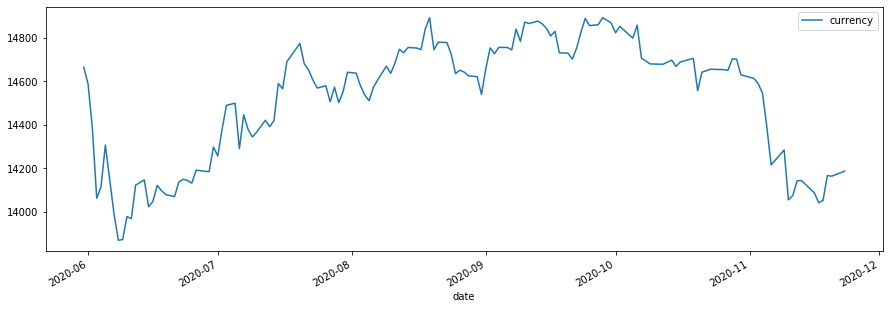

In [35]:
df.plot(x='date', figsize=(15,5))

The graph shows the fluctuative change of IDR currency towards the USD currency from 31 May until 26 November 2020. As can be seen, the IDR tends to have a lower-valued relative to USD in July to earlier of November 2020. This trend was marked by higher change rate of USD to IDR. At this moment, we can assume that the Indonesia's economic performance was weaker compared to other periods. Roughly,the IDR rates moved between 14600-14890 per 1 USD. However, this plot shows the improvement of Indonesia's economic at mid of November, which marked by the increasing of IDR rate value towards the USD into 14100. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.